#### Scripts  sueltos de proceso de DF u otros preliminares candidatos a volverse funciones


In [1]:
import pandas as pd

#Hacemos esto para ignorar varias advertencias específicas de Pandas
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importar el conjunto de datos raw
rawdata = pd.read_csv('../data/sie_data_raw.csv',sep=';')
rawdata.head()

,serieID,refAreaID,refAreaName,indicatorID,indicatorNameEN,indicatorNameES,indicatorNameENShort,indicatorNameESShort,dataDomainID,categoryID,...,unitName,unitMultID,unitMultValue,timeFormatID,MIEMBRO_FLAR,timeFormatName,timePeriod,Fecha_Estructurada,obsValue,obsValue_real
0,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2000-Q1,2000-03-01,"3819,126",3819126000
1,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2000-Q2,2000-06-01,"4402,479",4402479000
2,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2000-Q3,2000-09-01,"4906,653",4906653000
3,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2000-Q4,2000-12-01,"5190,343",5190343000
4,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2001-Q1,2001-03-01,"5904,082",5904082000


In [3]:
rawdata.shape

(93564, 23)

In [4]:
rawdata.dtypes

serieID                 object
refAreaID               object
refAreaName             object
indicatorID             object
indicatorNameEN         object
indicatorNameES         object
indicatorNameENShort    object
indicatorNameESShort    object
dataDomainID            object
categoryID               int64
freqID                  object
frequencyName           object
unitID                  object
unitName                object
unitMultID               int64
unitMultValue           object
timeFormatID            object
MIEMBRO_FLAR             int64
timeFormatName          object
timePeriod              object
Fecha_Estructurada      object
obsValue                object
obsValue_real           object
dtype: object

In [5]:
#Ajuste a los tipos de datos fecha y numero de cada valor observado
rawdata['Fecha_Estructurada'] = pd.to_datetime(rawdata['Fecha_Estructurada'], format='%Y-%m-%d')
rawdata['obsValue'] = rawdata['obsValue'].str.replace(',', '.', regex=True)
rawdata['obsValue'] = pd.to_numeric(rawdata['obsValue'])
rawdata['obsValue_real'] = rawdata['obsValue_real'].str.replace(',', '.', regex=True)
rawdata['obsValue_real'] = pd.to_numeric(rawdata['obsValue_real'])
rawdata.dtypes

serieID                         object
refAreaID                       object
refAreaName                     object
indicatorID                     object
indicatorNameEN                 object
indicatorNameES                 object
indicatorNameENShort            object
indicatorNameESShort            object
dataDomainID                    object
categoryID                       int64
freqID                          object
frequencyName                   object
unitID                          object
unitName                        object
unitMultID                       int64
unitMultValue                   object
timeFormatID                    object
MIEMBRO_FLAR                     int64
timeFormatName                  object
timePeriod                      object
Fecha_Estructurada      datetime64[ns]
obsValue                       float64
obsValue_real                  float64
dtype: object

In [6]:
clafdata=rawdata.copy()
clafdata=clafdata[['refAreaID','refAreaName','indicatorID','MIEMBRO_FLAR','Fecha_Estructurada','obsValue_real']]
clafdata.shape

(93564, 6)

In [7]:
clafdata.head()

,refAreaID,refAreaName,indicatorID,MIEMBRO_FLAR,Fecha_Estructurada,obsValue_real
0,EC,Ecuador,NGDP_PA_XDC,1,2000-03-01,3.819126e+09
1,EC,Ecuador,NGDP_PA_XDC,1,2000-06-01,4.402479e+09
2,EC,Ecuador,NGDP_PA_XDC,1,2000-09-01,4.906653e+09
3,EC,Ecuador,NGDP_PA_XDC,1,2000-12-01,5.190343e+09
4,EC,Ecuador,NGDP_PA_XDC,1,2001-03-01,5.904082e+09


In [8]:
clafdata["Indicator-fecha"] = clafdata["indicatorID"] +"_"+ clafdata["Fecha_Estructurada"].astype('str')
clafdata.head()

,refAreaID,refAreaName,indicatorID,MIEMBRO_FLAR,Fecha_Estructurada,obsValue_real,Indicator-fecha
0,EC,Ecuador,NGDP_PA_XDC,1,2000-03-01,3.819126e+09,NGDP_PA_XDC_2000-03-01
1,EC,Ecuador,NGDP_PA_XDC,1,2000-06-01,4.402479e+09,NGDP_PA_XDC_2000-06-01
2,EC,Ecuador,NGDP_PA_XDC,1,2000-09-01,4.906653e+09,NGDP_PA_XDC_2000-09-01
3,EC,Ecuador,NGDP_PA_XDC,1,2000-12-01,5.190343e+09,NGDP_PA_XDC_2000-12-01
4,EC,Ecuador,NGDP_PA_XDC,1,2001-03-01,5.904082e+09,NGDP_PA_XDC_2001-03-01


In [9]:
clafdata.drop('indicatorID', axis=1, inplace=True)
clafdata.drop('Fecha_Estructurada', axis=1, inplace=True)
clafdata.head()

,refAreaID,refAreaName,MIEMBRO_FLAR,obsValue_real,Indicator-fecha
0,EC,Ecuador,1,3.819126e+09,NGDP_PA_XDC_2000-03-01
1,EC,Ecuador,1,4.402479e+09,NGDP_PA_XDC_2000-06-01
2,EC,Ecuador,1,4.906653e+09,NGDP_PA_XDC_2000-09-01
3,EC,Ecuador,1,5.190343e+09,NGDP_PA_XDC_2000-12-01
4,EC,Ecuador,1,5.904082e+09,NGDP_PA_XDC_2001-03-01


In [10]:
clafdata=pd.pivot_table(clafdata, values = 'obsValue_real', index=['refAreaID','refAreaName','MIEMBRO_FLAR'], columns = 'Indicator-fecha').reset_index()
clafdata.head()

Indicator-fecha,refAreaID,refAreaName,MIEMBRO_FLAR,BCA_BP6_USD_1980-03-01,BCA_BP6_USD_1980-06-01,BCA_BP6_USD_1980-09-01,BCA_BP6_USD_1980-12-01,BCA_BP6_USD_1981-03-01,BCA_BP6_USD_1981-06-01,BCA_BP6_USD_1981-09-01,...,TXG_FOB_USD_2023-01-01,TXG_FOB_USD_2023-02-01,TXG_FOB_USD_2023-03-01,TXG_FOB_USD_2023-04-01,TXG_FOB_USD_2023-05-01,TXG_FOB_USD_2023-06-01,TXG_FOB_USD_2023-07-01,TXG_FOB_USD_2023-08-01,TXG_FOB_USD_2023-09-01,TXG_FOB_USD_2023-10-01
0,AR,Argentina,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.925331e+09,5.239194e+09,5.734575e+09,5.898250e+09,6.261858e+09,5.414915e+09,6.060343e+09,5.910266e+09,5.751000e+09,NaN
1,BO,Bolivia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.447497e+08,7.702248e+08,9.948223e+08,9.918004e+08,9.501458e+08,8.898648e+08,NaN,NaN,NaN,NaN
2,BR,Brazil,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.270570e+10,2.102480e+10,3.274670e+10,2.784390e+10,3.254200e+10,2.955240e+10,2.826600e+10,3.119320e+10,2.840630e+10,NaN
3,CL,Chile,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.979753e+09,8.314668e+09,9.813952e+09,7.609448e+09,7.836360e+09,7.939265e+09,7.393661e+09,8.063788e+09,7.341750e+09,7.725718e+09
4,CO,Colombia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.696200e+09,4.202200e+09,4.431900e+09,3.739200e+09,4.497900e+09,4.021000e+09,4.133900e+09,3.946900e+09,NaN,NaN


In [11]:
clafdata.shape

(19, 16727)

In [24]:
clafdata

Indicator-fecha,refAreaID,refAreaName,MIEMBRO_FLAR,BCA_BP6_USD_1980-03-01,BCA_BP6_USD_1980-06-01,BCA_BP6_USD_1980-09-01,BCA_BP6_USD_1980-12-01,BCA_BP6_USD_1981-03-01,BCA_BP6_USD_1981-06-01,BCA_BP6_USD_1981-09-01,...,TXG_FOB_USD_2023-01-01,TXG_FOB_USD_2023-02-01,TXG_FOB_USD_2023-03-01,TXG_FOB_USD_2023-04-01,TXG_FOB_USD_2023-05-01,TXG_FOB_USD_2023-06-01,TXG_FOB_USD_2023-07-01,TXG_FOB_USD_2023-08-01,TXG_FOB_USD_2023-09-01,TXG_FOB_USD_2023-10-01
0,AR,Argentina,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.925331e+09,5.239194e+09,5.734575e+09,5.898250e+09,6.261858e+09,5.414915e+09,6.060343e+09,5.910266e+09,5.751000e+09,NaN
1,BO,Bolivia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.447497e+08,7.702248e+08,9.948223e+08,9.918004e+08,9.501458e+08,8.898648e+08,NaN,NaN,NaN,NaN
2,BR,Brazil,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.270570e+10,2.102480e+10,3.274670e+10,2.784390e+10,3.254200e+10,2.955240e+10,2.826600e+10,3.119320e+10,2.840630e+10,NaN
3,CL,Chile,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.979753e+09,8.314668e+09,9.813952e+09,7.609448e+09,7.836360e+09,7.939265e+09,7.393661e+09,8.063788e+09,7.341750e+09,7.725718e+09
4,CO,Colombia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.696200e+09,4.202200e+09,4.431900e+09,3.739200e+09,4.497900e+09,4.021000e+09,4.133900e+09,3.946900e+09,NaN,NaN
5,CR,Costa Rica,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.302613e+09,1.455685e+09,1.646311e+09,1.384404e+09,1.654051e+09,1.611157e+09,1.419134e+09,1.550568e+09,1.521474e+09,NaN
6,DO,Dominican Republic,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,EC,Ecuador,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.337719e+09,2.522290e+09,2.601692e+09,2.528212e+09,2.638282e+09,2.530850e+09,2.567264e+09,2.620715e+09,NaN,NaN
8,GT,Guatemala,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,HN,Honduras,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
porcentaje_nan = clafdata.isnull().mean()
porcentaje_nan

Indicator-fecha
refAreaID                 0.000000
refAreaName               0.000000
MIEMBRO_FLAR              0.000000
BCA_BP6_USD_1980-03-01    0.947368
BCA_BP6_USD_1980-06-01    0.947368
                            ...   
TXG_FOB_USD_2023-06-01    0.421053
TXG_FOB_USD_2023-07-01    0.526316
TXG_FOB_USD_2023-08-01    0.526316
TXG_FOB_USD_2023-09-01    0.631579
TXG_FOB_USD_2023-10-01    0.947368
Length: 16727, dtype: float64

In [27]:
umbral = 0.5

# Selecciona las columnas que tienen un porcentaje de NaN menor o igual al umbral
columnas_a_mantener = porcentaje_nan[porcentaje_nan <= umbral].index

# Crea un nuevo DataFrame con las columnas seleccionadas
df_filtrado = clafdata[columnas_a_mantener]
df_filtrado.head()

Indicator-fecha,refAreaID,refAreaName,MIEMBRO_FLAR,BCA_BP6_USD_2012-03-01,BCA_BP6_USD_2012-06-01,BCA_BP6_USD_2012-09-01,BCA_BP6_USD_2012-12-01,BCA_BP6_USD_2013-03-01,BCA_BP6_USD_2013-06-01,BCA_BP6_USD_2013-09-01,...,TXG_FOB_USD_2022-09-01,TXG_FOB_USD_2022-10-01,TXG_FOB_USD_2022-11-01,TXG_FOB_USD_2022-12-01,TXG_FOB_USD_2023-01-01,TXG_FOB_USD_2023-02-01,TXG_FOB_USD_2023-03-01,TXG_FOB_USD_2023-04-01,TXG_FOB_USD_2023-05-01,TXG_FOB_USD_2023-06-01
0,AR,Argentina,0,-1.782000e+09,4.990000e+08,6.600000e+07,-9.210000e+08,-3.886000e+09,-3.260000e+08,-3.022000e+09,...,7.518384e+09,7.961979e+09,7.121966e+09,6.119181e+09,4.925331e+09,5.239194e+09,5.734575e+09,5.898250e+09,6.261858e+09,5.414915e+09
1,BO,Bolivia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.124608e+09,9.759881e+08,8.400070e+08,9.730043e+08,8.447497e+08,7.702248e+08,9.948223e+08,9.918004e+08,9.501458e+08,8.898648e+08
2,BR,Brazil,0,-2.465472e+10,-2.150709e+10,-1.909343e+10,-2.742293e+10,-2.752541e+10,-1.881576e+10,-2.332337e+10,...,2.982800e+10,2.714690e+10,2.793650e+10,2.656270e+10,2.270570e+10,2.102480e+10,3.274670e+10,2.784390e+10,3.254200e+10,2.955240e+10
3,CL,Chile,1,-8.381600e+08,-2.670280e+09,-6.338190e+09,-4.381760e+09,-2.873720e+09,-2.725620e+09,-4.195660e+09,...,7.851311e+09,8.071806e+09,8.057077e+09,9.241824e+09,8.979753e+09,8.314668e+09,9.813952e+09,7.609448e+09,7.836360e+09,7.939265e+09
4,CO,Colombia,1,-1.838261e+09,-3.235458e+09,-3.596242e+09,-2.970035e+09,-3.439158e+09,-2.205944e+09,-3.596219e+09,...,4.778500e+09,4.213200e+09,4.562200e+09,4.642100e+09,3.696200e+09,4.202200e+09,4.431900e+09,3.739200e+09,4.497900e+09,4.021000e+09


In [28]:
#pasamos al proceso de  graficar todas las series de tiempo como parte del EDA 


In [49]:
series_data=rawdata.copy()
#Indicadores de estudio  ( series de tiempo) 
#1.PIB ( Producto interno bruto)  ('NGDP_PA_USD', 'NGDP_PA_XDC')
#2. Inflacion  ('PCPI_IX')
#3. Deficit Cuentas corrientes ( % del PIB) ('BCA_BP6_USD')
#4. Deficit Fiscal ( % del PIB) ('CG_GOB_XDC')
#5. Deuda ( % del PIB) ('CG_DT_XDC', 'CG_DT_USD')
#6. Tasa Interes Politica Monetaria ('FPOLM_PA')
#7. Agregado monetarios M2 o M3 ( %PIB). (FM2_XDC)
indicadores=['NGDP_PA_USD', 'NGDP_PA_XDC','PCPI_IX','BCA_BP6_USD','CG_GOB_XDC','CG_DT_XDC', 'CG_DT_USD','FPOLM_PA','FM2_XDC']

Total de datos por pintar es (62, 23)
Total de datos por pintar es (110, 23)


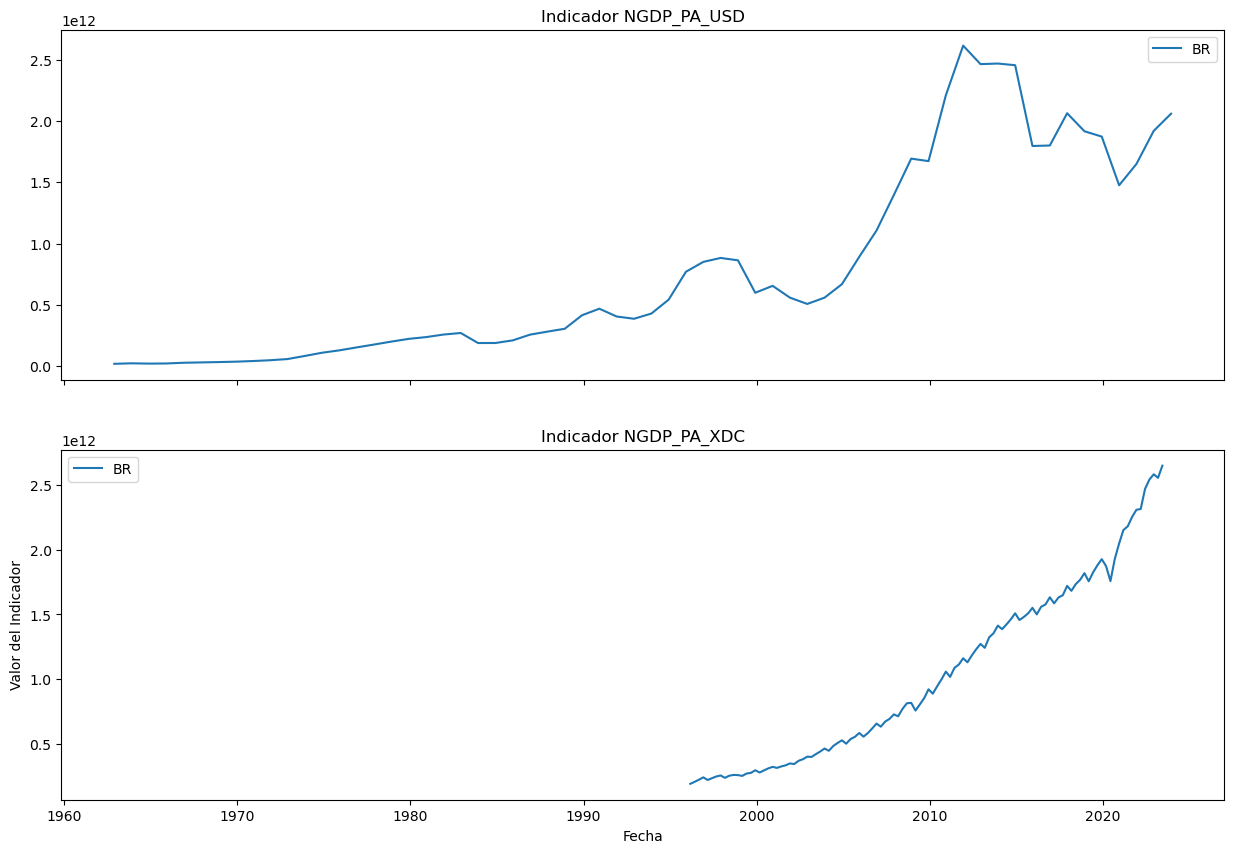

In [61]:
series_data=rawdata.copy()
series_data = series_data.sort_values(by='Fecha_Estructurada')

indicadores=['NGDP_PA_USD','NGDP_PA_XDC']


import matplotlib.pyplot as plt
import pandas as pd

num_indicadores = len(indicadores)
fig, axs = plt.subplots(num_indicadores, 1, figsize=(15, 5*num_indicadores), sharex=True)

# Iterar por cada indicador
for i, indicador in enumerate(indicadores):
    # Filtrar datos para el indicador actual
    data_indicador = series_data[series_data['indicatorID'] == indicador]
    
    # Iterar por cada país y graficar la serie temporal
    paises = data_indicador['refAreaID'].unique()
    paises=['BR']

    
    for pais in paises:
        data_pais = data_indicador[data_indicador['refAreaID'] == pais]
        print("Total de datos por pintar es {}".format(data_pais.shape) )
        axs[i].plot(data_pais['Fecha_Estructurada'], data_pais['obsValue_real'], label=f'{pais}')
    
    axs[i].set_title(f'Indicador {indicador}')
    axs[i].legend()

plt.xlabel('Fecha')
plt.ylabel('Valor del Indicador')
plt.show()

In [91]:
#pasamos ahora a preparar los datos para las correlaciones
df=rawdata.copy()
df=df[['refAreaID','indicatorID','Fecha_Estructurada','obsValue_real']]
df.shape

(93564, 4)

In [92]:
df_pivot = df.pivot_table(index=['Fecha_Estructurada', 'refAreaID'], columns='indicatorID', values='obsValue_real').reset_index()
df_pivot.shape

(11878, 47)

In [93]:
df_pivot

indicatorID,Fecha_Estructurada,refAreaID,BCA_BP6_USD,BIP_BP6_USD,BIS_BP6_USD,BKF_BP6_USD,BMG_BP6_USD,BS_BP6_USD,BXG_BP6_USD,CG_DD_XDC,...,LLF_PE_NUM,LUR_PT,NGDP_PA_R_XDC,NGDP_PA_USD,NGDP_PA_XDC,PCPI_IX,RAFA_USD,TMG_CIF_USD,TTT_BY_CP_A_IX,TXG_FOB_USD
0,1937-01-01,BO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.423622e-08,NaN,NaN,NaN,NaN
1,1937-02-01,BO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.458773e-08,NaN,NaN,NaN,NaN
2,1937-03-01,BO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.537863e-08,NaN,NaN,NaN,NaN
3,1937-04-01,BO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.432409e-08,NaN,NaN,NaN,NaN
4,1937-05-01,BO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.406046e-08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11873,2023-12-01,PY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.462300e+10,NaN,NaN,NaN,NaN,NaN,NaN
11874,2023-12-01,SV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.341800e+10,NaN,NaN,NaN,NaN,NaN,NaN
11875,2023-12-01,UY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.298600e+10,NaN,NaN,NaN,NaN,NaN,NaN
11876,2024-04-01,EC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
umbral_por_fila = 0.5  # Ajusta este valor según tus necesidades

# Calcula la proporción de valores no nulos por fila
proporcion_no_nulos_por_fila = df_pivot.notnull().mean(axis=1)

# Filtra las filas que superan el umbral
filas_a_mantener = proporcion_no_nulos_por_fila[proporcion_no_nulos_por_fila >= umbral_por_fila].index

# Filtra el DataFrame original
df_pivot_filtrado_por_fila = df_pivot.loc[filas_a_mantener]
df_pivot_filtrado_por_fila




indicatorID,Fecha_Estructurada,refAreaID,BCA_BP6_USD,BIP_BP6_USD,BIS_BP6_USD,BKF_BP6_USD,BMG_BP6_USD,BS_BP6_USD,BXG_BP6_USD,CG_DD_XDC,...,LLF_PE_NUM,LUR_PT,NGDP_PA_R_XDC,NGDP_PA_USD,NGDP_PA_XDC,PCPI_IX,RAFA_USD,TMG_CIF_USD,TTT_BY_CP_A_IX,TXG_FOB_USD
6456,1999-12-01,CR,-3.149502e+08,-1.632351e+08,1.673614e+07,-3.082659e+08,1.299944e+09,1.229284e+08,1.008564e+09,NaN,...,NaN,NaN,4.355972e+12,1.425900e+10,1.140919e+12,27.030463,1.472098e+09,1.066884e+09,NaN,5.216327e+08
6520,2000-03-01,PY,-5.734874e+07,-2.942117e+08,4.457750e+07,1.543049e+08,5.868250e+08,-3.609500e+07,8.152055e+08,NaN,...,NaN,NaN,2.493415e+13,NaN,7.098192e+12,34.017913,NaN,2.026684e+08,93.389158,3.168119e+08
6574,2000-06-01,PY,-7.900039e+06,-2.805363e+08,4.307750e+07,1.979776e+07,6.744250e+08,-5.778500e+07,9.617687e+08,NaN,...,NaN,NaN,2.670765e+13,NaN,7.644025e+12,34.237916,NaN,2.281665e+08,94.791241,3.129310e+08
6628,2000-09-01,PY,-5.273460e+07,-2.947313e+08,4.457750e+07,4.849576e+07,7.486250e+08,-5.615500e+07,1.002199e+09,NaN,...,NaN,NaN,2.544100e+13,NaN,7.391920e+12,35.049175,NaN,2.315409e+08,86.654080,3.126753e+08
6672,2000-12-01,CO,3.133572e+08,-4.453066e+08,4.424376e+08,1.134623e+07,2.837204e+09,-3.912905e+08,3.544721e+09,3.262129e+13,...,NaN,NaN,NaN,9.927000e+10,NaN,8.750000,8.738390e+09,9.941000e+08,98.002247,1.228400e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11777,2023-06-01,CO,-2.524484e+09,-3.401804e+09,3.017980e+09,-2.846336e+09,1.451584e+10,-4.276291e+08,1.280281e+10,NaN,...,NaN,9.342310,2.402666e+14,NaN,3.774650e+14,133.780000,5.726816e+10,5.015200e+09,148.735792,4.021000e+09
11778,2023-06-01,CR,1.445114e+08,-1.448062e+09,1.362332e+08,-1.896393e+09,5.432326e+09,2.120129e+09,4.768538e+09,NaN,...,NaN,9.584412,9.884816e+12,NaN,1.101158e+13,109.742531,1.113879e+10,3.636323e+09,NaN,1.611157e+09
11780,2023-06-01,EC,8.914153e+08,-5.406910e+08,1.192920e+09,7.399544e+08,7.046983e+09,-4.835186e+08,7.769688e+09,NaN,...,NaN,3.800000,1.812258e+10,NaN,2.969675e+10,111.180000,6.966529e+09,2.274317e+09,NaN,2.530850e+09
11784,2023-06-01,MX,6.247070e+09,1.321390e+09,3.112000e+08,6.885600e+09,1.524293e+11,1.617726e+10,1.510437e+11,NaN,...,NaN,2.671768,NaN,NaN,NaN,128.210000,2.104379e+11,5.176202e+10,48.534000,5.180021e+10


In [95]:
# ahora  por columnas

umbral_por_columna = 0.5  # Ajusta este valor según tus necesidades

# Calcula la proporción de valores no nulos por columna
proporcion_no_nulos_por_columna = df_pivot_filtrado_por_fila.notnull().mean(axis=0)

# Filtra las columnas que superan el umbral
columnas_a_mantener = proporcion_no_nulos_por_columna[proporcion_no_nulos_por_columna >= umbral_por_columna].index

# Filtra el DataFrame original
df_pivot_filtrado_por_columna = df_pivot_filtrado_por_fila[columnas_a_mantener]
df_pivot_filtrado_por_columna

indicatorID,Fecha_Estructurada,refAreaID,BCA_BP6_USD,BIP_BP6_USD,BIS_BP6_USD,BKF_BP6_USD,BMG_BP6_USD,BS_BP6_USD,BXG_BP6_USD,CG_DE_XDC,...,FSNNC_XDC,LEUR_PT,LUR_PT,NGDP_PA_R_XDC,NGDP_PA_XDC,PCPI_IX,RAFA_USD,TMG_CIF_USD,TTT_BY_CP_A_IX,TXG_FOB_USD
6456,1999-12-01,CR,-3.149502e+08,-1.632351e+08,1.673614e+07,-3.082659e+08,1.299944e+09,1.229284e+08,1.008564e+09,NaN,...,6.268572e+11,NaN,NaN,4.355972e+12,1.140919e+12,27.030463,1.472098e+09,1.066884e+09,NaN,5.216327e+08
6520,2000-03-01,PY,-5.734874e+07,-2.942117e+08,4.457750e+07,1.543049e+08,5.868250e+08,-3.609500e+07,8.152055e+08,NaN,...,2.642023e+12,NaN,NaN,2.493415e+13,7.098192e+12,34.017913,NaN,2.026684e+08,93.389158,3.168119e+08
6574,2000-06-01,PY,-7.900039e+06,-2.805363e+08,4.307750e+07,1.979776e+07,6.744250e+08,-5.778500e+07,9.617687e+08,NaN,...,2.591000e+12,NaN,NaN,2.670765e+13,7.644025e+12,34.237916,NaN,2.281665e+08,94.791241,3.129310e+08
6628,2000-09-01,PY,-5.273460e+07,-2.947313e+08,4.457750e+07,4.849576e+07,7.486250e+08,-5.615500e+07,1.002199e+09,NaN,...,2.721545e+12,NaN,NaN,2.544100e+13,7.391920e+12,35.049175,NaN,2.315409e+08,86.654080,3.126753e+08
6672,2000-12-01,CO,3.133572e+08,-4.453066e+08,4.424376e+08,1.134623e+07,2.837204e+09,-3.912905e+08,3.544721e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,8.750000,8.738390e+09,9.941000e+08,98.002247,1.228400e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11777,2023-06-01,CO,-2.524484e+09,-3.401804e+09,3.017980e+09,-2.846336e+09,1.451584e+10,-4.276291e+08,1.280281e+10,3.212688e+14,...,6.465826e+14,8.396398,9.342310,2.402666e+14,3.774650e+14,133.780000,5.726816e+10,5.015200e+09,148.735792,4.021000e+09
11778,2023-06-01,CR,1.445114e+08,-1.448062e+09,1.362332e+08,-1.896393e+09,5.432326e+09,2.120129e+09,4.768538e+09,NaN,...,1.531401e+13,6.464763,9.584412,9.884816e+12,1.101158e+13,109.742531,1.113879e+10,3.636323e+09,NaN,1.611157e+09
11780,2023-06-01,EC,8.914153e+08,-5.406910e+08,1.192920e+09,7.399544e+08,7.046983e+09,-4.835186e+08,7.769688e+09,4.614936e+10,...,NaN,20.100000,3.800000,1.812258e+10,2.969675e+10,111.180000,6.966529e+09,2.274317e+09,NaN,2.530850e+09
11784,2023-06-01,MX,6.247070e+09,1.321390e+09,3.112000e+08,6.885600e+09,1.524293e+11,1.617726e+10,1.510437e+11,3.734570e+12,...,NaN,7.771255,2.671768,NaN,NaN,128.210000,2.104379e+11,5.176202e+10,48.534000,5.180021e+10


In [101]:
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas que quieres escalar
columnas_a_escalar = df_pivot_filtrado_por_columna.columns[-30:]

In [102]:
columnas_a_escalar

Index(['BIS_BP6_USD', 'BKF_BP6_USD', 'BMG_BP6_USD', 'BS_BP6_USD',
       'BXG_BP6_USD', 'CG_DE_XDC', 'CG_DT_XDC', 'CG_GOB_XDC', 'CG_GPB_XDC',
       'D_USD', 'EA_IX', 'ENDA_XDC_USD_RATE', 'ENDE_XDC_USD_RATE', 'FASMB_XDC',
       'FID_FX_XDC', 'FID_NC_XDC', 'FM2_XDC', 'FPOLM_PA', 'FSANL_PT',
       'FSNFC_XDC', 'FSNNC_XDC', 'LEUR_PT', 'LUR_PT', 'NGDP_PA_R_XDC',
       'NGDP_PA_XDC', 'PCPI_IX', 'RAFA_USD', 'TMG_CIF_USD', 'TTT_BY_CP_A_IX',
       'TXG_FOB_USD'],
      dtype='object', name='indicatorID')

<Figure size 1200x800 with 0 Axes>

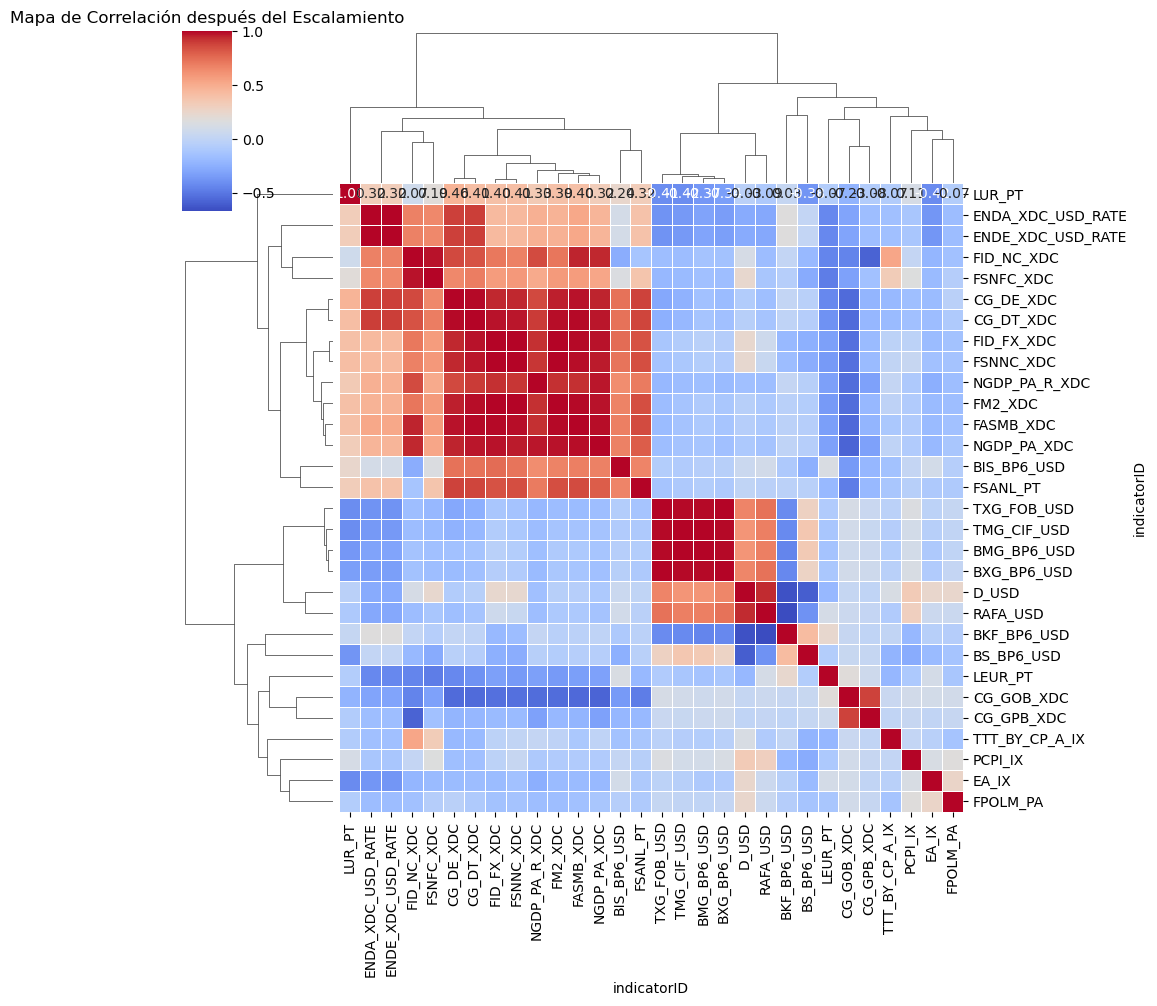

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

#df_para_escalado = df_pivot_filtrado_por_columna[['Fecha_Estructurada', 'refAreaID'] + columnas_a_escalar]
df_para_escalado=df_pivot_filtrado_por_columna

# Inicializa el StandardScaler
scaler = StandardScaler()

# Escala las columnas numéricas (excluyendo 'Fecha_Estructurada' y 'refAreaID')
df_escala = df_para_escalado[columnas_a_escalar].apply(lambda col: scaler.fit_transform(col.values.reshape(-1, 1)).flatten())

# Combina las columnas escaladas con las demás columnas
df_escala = pd.concat([df_para_escalado[['Fecha_Estructurada', 'refAreaID']], df_escala], axis=1)

# Calcula la correlación después del escalado
correlacion_escalada = df_escala[columnas_a_escalar].corr()

# Utiliza clustermap para organizar las filas y columnas según la correlación
plt.figure(figsize=(12, 8))
sns.clustermap(correlacion_escalada, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Correlación después del Escalamiento')
plt.show()
